In [1]:
# ライブラリーの読み込み
import numpy as np
import pandas as pd
import pmdarima as pm
from pmdarima import datasets
from pmdarima import utils
from pmdarima import arima
from pmdarima import model_selection
from sklearn.metrics import mean_absolute_error
from statistics import mean 
from matplotlib import pyplot as plt
# グラフのスタイルとサイズ
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = [12, 9]

In [2]:
# データの読み込み
data = datasets.load_airpassengers()

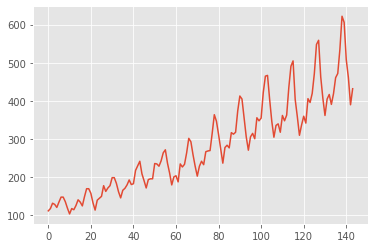

In [3]:
# グラフ（折れ線）
plt.plot(data)

In [4]:
data

array([112., 118., 132., 129., 121., 135., 148., 148., 136., 119., 104.,
       118., 115., 126., 141., 135., 125., 149., 170., 170., 158., 133.,
       114., 140., 145., 150., 178., 163., 172., 178., 199., 199., 184.,
       162., 146., 166., 171., 180., 193., 181., 183., 218., 230., 242.,
       209., 191., 172., 194., 196., 196., 236., 235., 229., 243., 264.,
       272., 237., 211., 180., 201., 204., 188., 235., 227., 234., 264.,
       302., 293., 259., 229., 203., 229., 242., 233., 267., 269., 270.,
       315., 364., 347., 312., 274., 237., 278., 284., 277., 317., 313.,
       318., 374., 413., 405., 355., 306., 271., 306., 315., 301., 356.,
       348., 355., 422., 465., 467., 404., 347., 305., 336., 340., 318.,
       362., 348., 363., 435., 491., 505., 404., 359., 310., 337., 360.,
       342., 406., 396., 420., 472., 548., 559., 463., 407., 362., 405.,
       417., 391., 419., 461., 472., 535., 622., 606., 508., 461., 390.,
       432.])

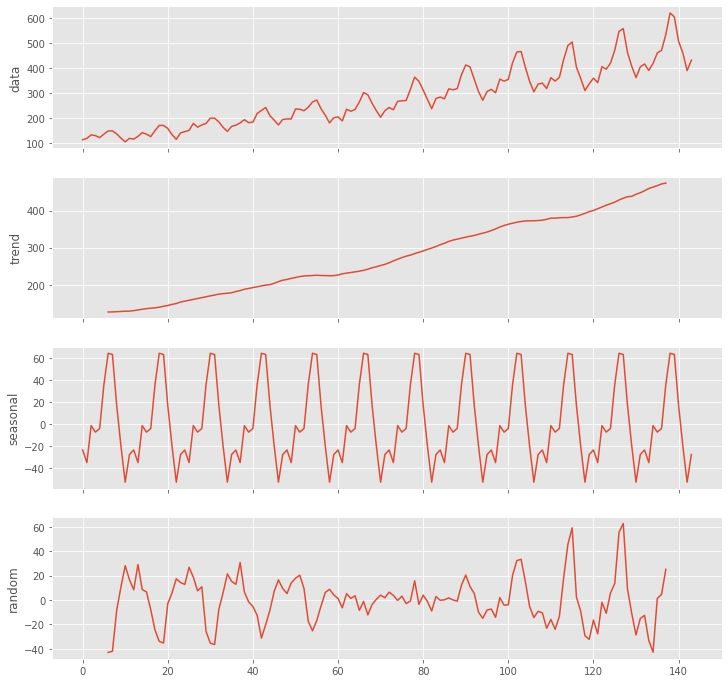

In [5]:
# 要素分解（tread・seasonal・random）
utils.decomposed_plot(arima.decompose(data,'additive',m=12),
                      figure_kwargs = {'figsize': (12, 12)} )

/home/hajime/.local/lib/python3.8/site-packages/pmdarima/utils/visualization.py:220: FutureWarning: the 'unbiased'' keyword is deprecated, use 'adjusted' instead.
  res = tsaplots.plot_acf(


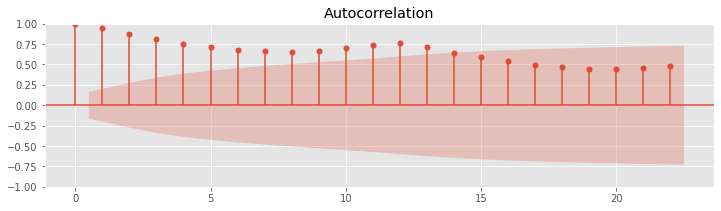

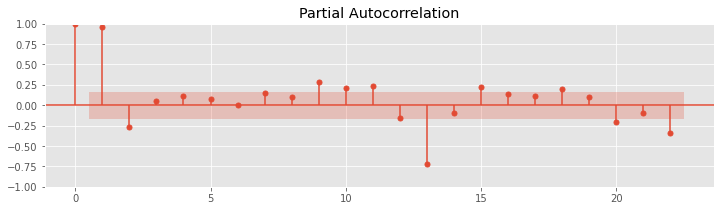

In [6]:
# グラフのサイズ変更
plt.rcParams['figure.figsize'] = [12, 3]
# 自己相関と偏自己相関
utils.plot_acf(data, alpha=.05)
utils.plot_pacf(data, alpha=.05)
 

In [7]:
# 階差の次数の検討
print('d =', arima.ndiffs(data)) #d（階差）
print('D =', arima.nsdiffs(data,m=12)) #D（季節階差）


d = 1
D = 1


In [8]:
# 通常の階差処理を1回しさらに季節階差処理を1回
data_d1_d12 = pd.DataFrame(data).diff(1).diff(12).dropna()

In [9]:
data_d1_d12

,0
13,5.0
14,1.0
15,-3.0
16,-2.0
17,10.0
...,...
139,-27.0
140,-2.0
141,9.0
142,-26.0


In [17]:
# データ分割（train:学習データ、test:テストデータ）
train, test = model_selection.train_test_split(data, train_size=132)

In [18]:
# モデル構築（Auto ARIMA）
arima_model = pm.auto_arima(train, 
                            seasonal=True,
                            m=12,
                            trace=True,
                            n_jobs=-1,
                            maxiter=10)

/home/hajime/.local/lib/python3.8/site-packages/pmdarima/arima/_validation.py:76: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  warnings.warn('stepwise model cannot be fit in parallel (n_jobs=%i). '


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,1,1)[12] intercept   : AIC=911.913, Time=0.72 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=1022.234, Time=0.02 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=906.865, Time=0.27 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=963.556, Time=0.21 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=1192.711, Time=0.02 sec
 ARIMA(1,0,0)(0,1,0)[12] intercept   : AIC=907.180, Time=0.07 sec
 ARIMA(1,0,0)(2,1,0)[12] intercept   : AIC=908.723, Time=4.70 sec
 ARIMA(1,0,0)(1,1,1)[12] intercept   : AIC=909.369, Time=0.32 sec
 ARIMA(1,0,0)(0,1,1)[12] intercept   : AIC=907.124, Time=0.17 sec
 ARIMA(1,0,0)(2,1,1)[12] intercept   : AIC=911.772, Time=3.79 sec
 ARIMA(0,0,0)(1,1,0)[12] intercept   : AIC=1021.870, Time=0.22 sec
 ARIMA(2,0,0)(1,1,0)[12] intercept   : AIC=906.478, Time=0.31 sec
 ARIMA(2,0,0)(0,1,0)[12] intercept   : AIC=906.075, Time=0.09 sec
 ARIMA(2,0,0)(0,1,1)[12] intercept   : AIC=906.717, Time=0.22 sec
 ARIMA(2,0,0)(1,1,1)[12] inter

MAE:
14.898208317448123
MAPE(%):
3.0975615303185338


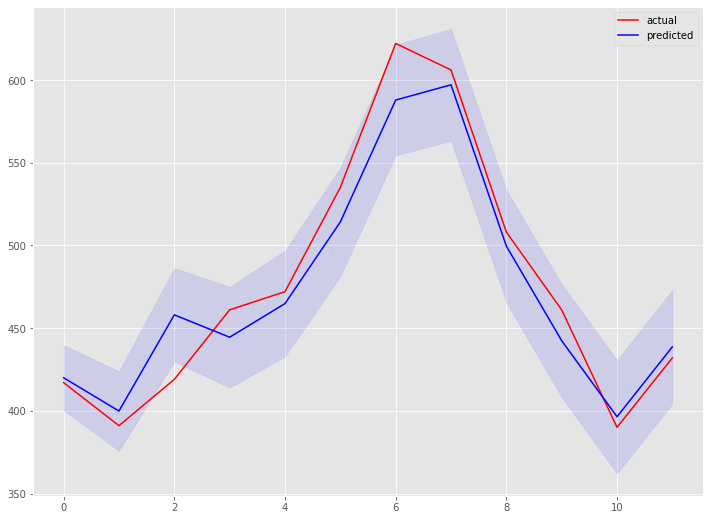

In [19]:
# グラフのサイズ変更
plt.rcParams['figure.figsize'] = [12, 9]
# 予測
preds, conf_int = arima_model.predict(n_periods=test.shape[0], 
                                      return_conf_int=True)
# 予測精度
print('MAE:')
print(mean_absolute_error(test, preds)) 
print('MAPE(%):')
print(mean(abs(test - preds)/test) *100)
# 予測と実測の比較（グラフ）
x_axis = np.arange(preds.shape[0])
plt.plot(x_axis,test,label="actual",color='r') 
plt.plot(x_axis,preds,label="predicted",color='b')
plt.fill_between(x_axis[-preds.shape[0]:],
                 conf_int[:, 0], conf_int[:, 1],
                 alpha=0.1, color='b')
plt.legend()
plt.show()
 

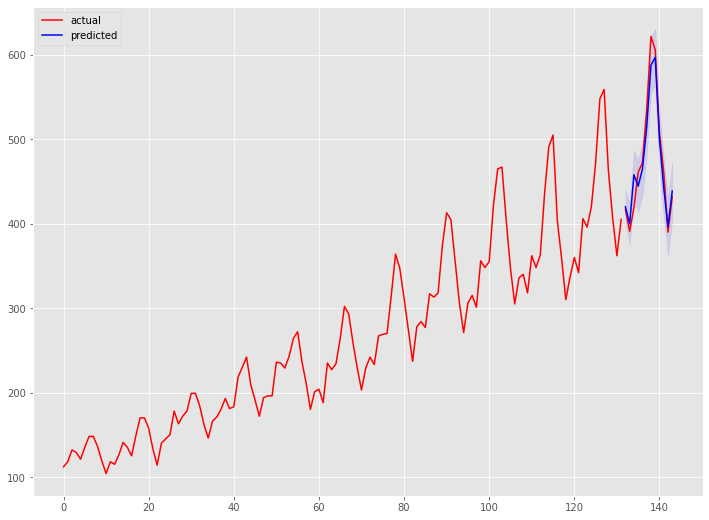

In [20]:
# グラフ（学習データとテストデータ、予測結果）
x_axis = np.arange(train.shape[0] + preds.shape[0])
plt.plot(x_axis[:train.shape[0]],train,color='r',label="actual")
plt.plot(x_axis[train.shape[0]:],test,color='r')
plt.plot(x_axis[train.shape[0]:],preds,color='b',label="predicted")
plt.fill_between(x_axis[-preds.shape[0]:],
                 conf_int[:, 0], conf_int[:, 1],
                 alpha=0.1,color='b')
plt.legend()
plt.show()
 

/home/hajime/.local/lib/python3.8/site-packages/pmdarima/arima/_validation.py:76: UserWarning: stepwise model cannot be fit in parallel (n_jobs=1). Falling back to stepwise parameter search.
  warnings.warn('stepwise model cannot be fit in parallel (n_jobs=%i). '


MAE:
18.527652990128036
MAPE(%):
4.182388631290588


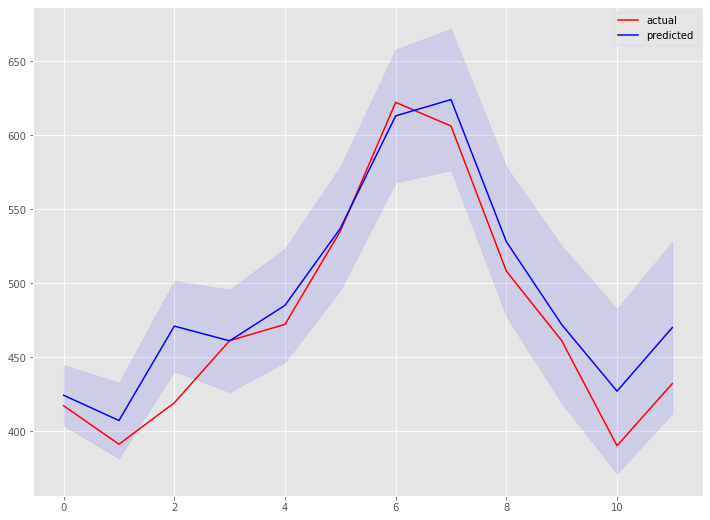

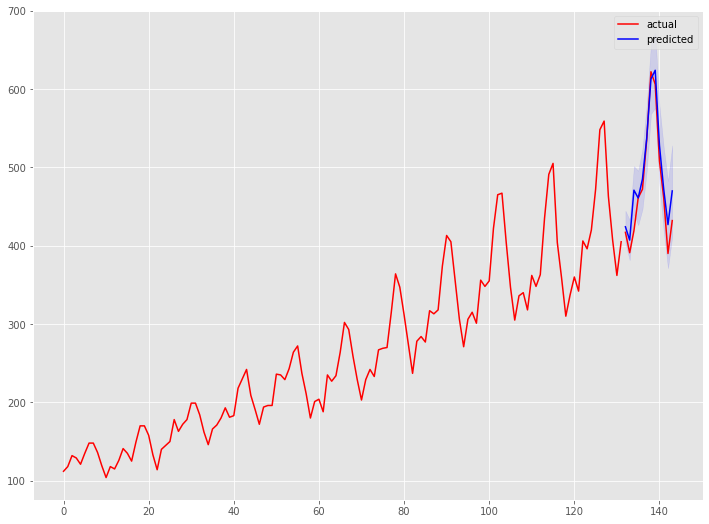

In [21]:
# モデル構築（Auto ARIMA）
arima_model = pm.auto_arima(train, 
                             seasonal=True,
                             m=12,
                             d=1,
                             D=1,
                             n_jobs=-1,
                             maxiter=10)
# グラフのサイズ変更
plt.rcParams['figure.figsize'] = [12, 9]
# 予測
preds, conf_int = arima_model.predict(n_periods=test.shape[0], 
                                      return_conf_int=True)
# 予測精度
print('MAE:')
print(mean_absolute_error(test, preds)) 
print('MAPE(%):')
print(mean(abs(test - preds)/test) *100)
# 予測と実測の比較（グラフ）
x_axis = np.arange(preds.shape[0])
plt.plot(x_axis,test,label="actual",color='r') 
plt.plot(x_axis,preds,label="predicted",color='b')
plt.fill_between(x_axis[-preds.shape[0]:],
                 conf_int[:, 0], conf_int[:, 1],
                 alpha=0.1, color='b')
plt.legend()
plt.show()
# グラフ（学習データとテストデータ、予測結果）
x_axis = np.arange(train.shape[0] + preds.shape[0])
plt.plot(x_axis[:train.shape[0]],train,color='r',label="actual")
plt.plot(x_axis[train.shape[0]:],test,color='r')
plt.plot(x_axis[train.shape[0]:],preds,color='b',label="predicted")
plt.fill_between(x_axis[-preds.shape[0]:],
                 conf_int[:, 0], conf_int[:, 1],
                 alpha=0.1,color='b')
plt.legend()
plt.show()